1. Packages

In [24]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()


Saving Gold vs year.txt to Gold vs year (1).txt


In [25]:
import pandas as pd

# Load the data
data = pd.read_excel('Gold vs Year.xlsx')

# Rename columns
data.columns = ['Year', 'Gold Price']

# Converting Year to numeric and handle missing values
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna()

# Displaying first 5 tuples
data.head()


,Year,Gold Price
0,1965.0,71.75
1,1966.0,83.75
2,1967.0,102.50
3,1968.0,162.00
4,1969.0,176.00


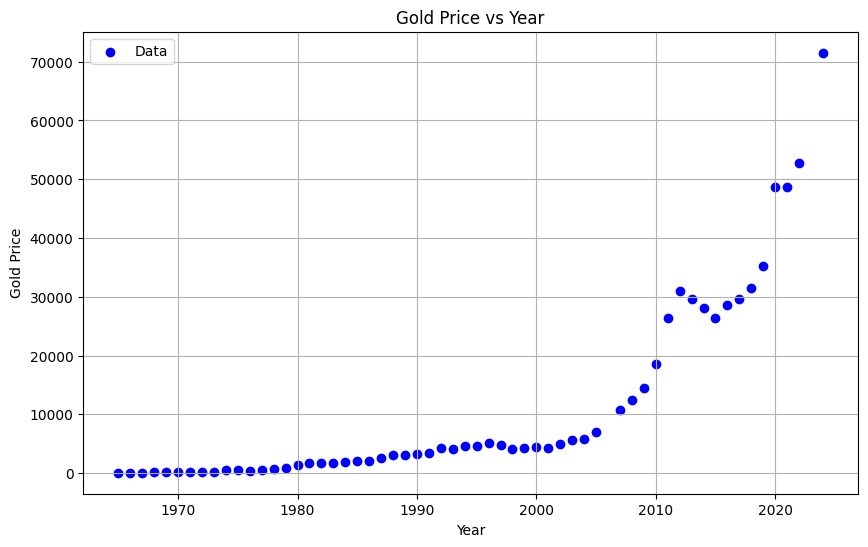

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Gold Price'], color='blue', label='Data')
plt.title('Gold Price vs Year')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.grid(True)
plt.legend()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data[['Year']]
y = data['Gold Price']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 46
Testing set size: 12


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline for Polynomial Regression with degree 2
degree = 5
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
poly_model.fit(X_train, y_train)

# Predict on test data
y_pred = poly_model.predict(X_test)

# Display coefficients
print("Model Coefficients:", poly_model.named_steps['linearregression'].coef_)
print("Model Intercept:", poly_model.named_steps['linearregression'].intercept_)


Model Coefficients: [ 0.00000000e+00  1.76706154e-07  1.04088907e-03  1.03814255e+00
 -7.84580920e-04  1.58119023e-07]
Model Intercept: -811653863.2049205


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 14710180.84990184
R² Score: 0.9057041342274705


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


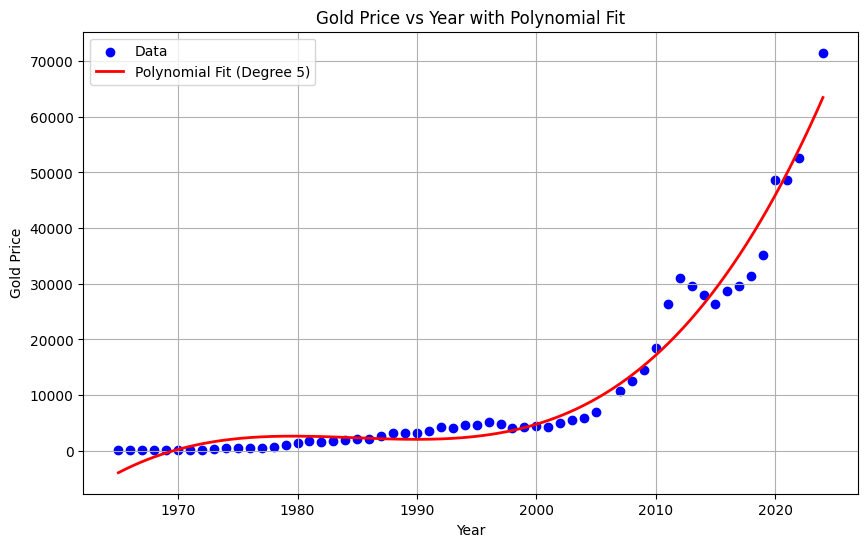

In [30]:
import numpy as np

# Create a smooth range of years for plotting the curve
years = np.linspace(data['Year'].min(), data['Year'].max(), 500).reshape(-1, 1)
gold_price_pred = poly_model.predict(years)

# Plot data and polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Gold Price'], color='blue', label='Data')
plt.plot(years, gold_price_pred, color='red', linewidth=2, label=f'Polynomial Fit (Degree {degree})')
plt.title('Gold Price vs Year with Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.grid(True)
plt.legend()
plt.show()


In [31]:
# Example: Predict gold price for the year 2025
new_year = pd.DataFrame({'Year': [2025]})
predicted_price = poly_model.predict(new_year)
print(f"Predicted Gold Price for 2025: {predicted_price[0]}")


Predicted Gold Price for 2025: 68486.58198952675


In [ ]:
import joblib

# Save the trained model to a .pkl file
joblib.dump(poly_model, 'Gold_Prediction_model.pkl')
print("Model saved as Gold_Prediction_model.pkl")


Model saved as polynomial_regression_model.pkl


In [ ]:
from google.colab import files

# Download the .pkl file
files.download('Gold_Prediction_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>